In [142]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [143]:
# Get the list of S&P 500 companies:
all_dfs = pd.read_html("https://docs.google.com/spreadsheets/d/1UZyUSfh5XX_hr6OjMmIX3OnCE_gJ9h2Usta8pfL3I00/edit?usp=sharing")
df = all_dfs[0]
df = df.loc[:,"A"].dropna() # drop missing values

tickers_list = df.to_list()
#print(tickers_list)

In [144]:
# Load daily data from Yahoo finance:
start_date = '2020-03-15'
end_date   = '2022-01-15'

df = yf.download(tickers_list, start_date, end_date)
df = df['Adj Close']
df = df.dropna()

[*********************100%***********************]  100 of 100 completed


In [145]:
#calculate the daily returns and sum of daily returns:
daily_returns = df.pct_change()
total_returns = daily_returns.sum()
print('ES=F:', total_returns['ES=F']) #Sum of daily returns for S&P500

ES=F: 0.6971204238682449


In [146]:
#Find the companies that outperform S&P500:
df_better = total_returns[ total_returns > total_returns['ES=F'] ]
print('--- Companies that outperform S&P500 ---')
#print(df_better)

--- Companies that outperform S&P500 ---


In [147]:
# sort the list and show the list of top 10 companies according to total daily returns:
df_sorted = df_better.sort_values(ascending=False)
print('--- The best [10] ---')
print(df_sorted[:10])

--- The best [10] ---
TSLA    2.912931
NVDA    1.915990
AMAT    1.643638
COP     1.515368
AMD     1.485289
AVGO    1.357482
LOW     1.337467
MS      1.320233
SCHW    1.296574
DE      1.294363
dtype: float64


In [148]:
# Now lets get the data on the top 10 companies and plot their returns:
top10=df_sorted[:10].keys().to_list()
#top10

In [149]:
df = yf.download(top10, start_date, end_date)['Adj Close']
df = df.dropna()
#df

[*********************100%***********************]  10 of 10 completed


In [150]:
# Prices in the first and last day and return in the last day relative to the first day:
for column in df.columns:
    first = df[column][0]
    last = df[column][-1]
    change = 100 * (last-first)/first
    #print("{} change: {:.2f}%".format(column, change))
    print("{} first:{:.1f} last:{:.1f} change: {:.1f}%".format(column, first, last, change))

AMAT first:39.7 last:166.3 change: 319.2%
AMD first:38.7 last:136.9 change: 253.6%
AVGO first:171.6 last:587.5 change: 242.3%
COP first:23.9 last:85.0 change: 255.1%
DE first:116.0 last:377.2 change: 225.2%
LOW first:69.7 last:240.3 change: 244.6%
MS first:29.7 last:97.4 change: 227.3%
NVDA first:49.0 last:269.3 change: 449.8%
SCHW first:29.7 last:95.0 change: 220.5%
TSLA first:89.0 last:1049.6 change: 1079.2%


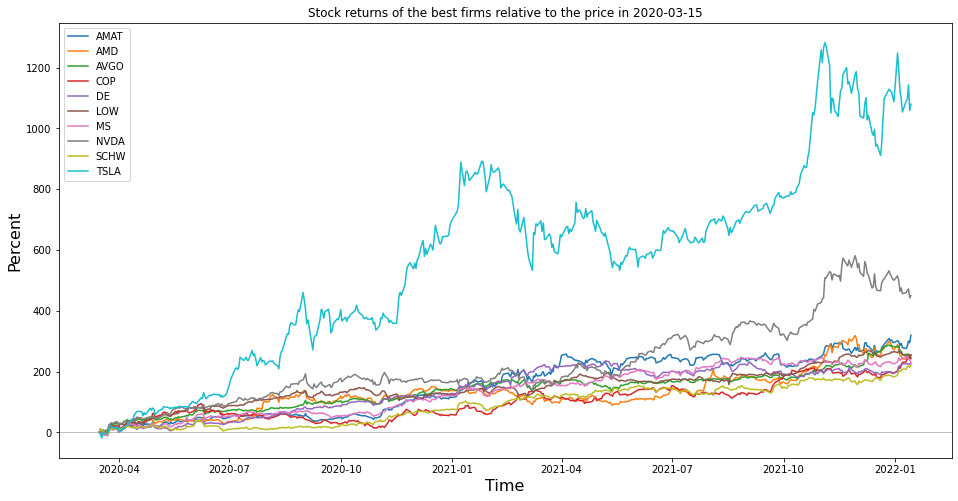

In [151]:
plt.figure(figsize=(16,8))
for col in df.columns:
    df["p_" + col] = (df[col] / df[col].iat[0] - 1) * 100
    plt.plot(df["p_" + col], label="p_" + col)

plt.legend(df.columns)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Percent', fontsize=16)
plt.title("Stock returns of the best firms relative to the price in {}".format(start_date))
plt.axhline(y = 0, color = 'gray', linewidth=0.5)
plt.show()

In [152]:
df_worse= total_returns[ total_returns < total_returns['ES=F'] ]
print('--- companies that could not beat S&P500---')
#print(df_selected)

--- companies that could not beat S&P500---


In [153]:
df_sorted = df_worse.sort_values(ascending=False)
print('--- The worst [10] ---')
print(df_sorted[-10:])

--- The worst [10] ---
LMT     0.381009
JNJ     0.365400
BMY     0.352188
AMT     0.339537
AMGN    0.339396
MRK     0.320675
VRTX    0.277826
GILD    0.179598
VZ      0.161404
T       0.096837
dtype: float64


In [154]:
# Now lets get the data on the worst 5 companies, plot their returns and compare it with S&P500:
worst10=df_sorted[-5:].keys().to_list()
worst10.append('ES=F')
worst10

['MRK', 'VRTX', 'GILD', 'VZ', 'T', 'ES=F']

In [155]:
df = yf.download(worst10, start_date, end_date)['Adj Close']
df = df.dropna()
#df

[*********************100%***********************]  6 of 6 completed


In [156]:
# Prices in the first and last day and return in the last day relative to the first day:
for column in df.columns:
    first = df[column][0]
    last = df[column][-1]
    change = 100 * (last-first)/first
    #print("{} change: {:.2f}%".format(column, change))
    print("{} first:{:.1f} last:{:.1f} change: {:.1f}%".format(column, first, last, change))

ES=F first:2416.2 last:4654.8 change: 92.6%
GILD first:62.5 last:70.0 change: 12.0%
MRK first:61.9 last:80.0 change: 29.4%
T first:19.3 last:20.0 change: 3.6%
VRTX first:199.8 last:234.1 change: 17.2%
VZ first:45.5 last:52.0 change: 14.2%


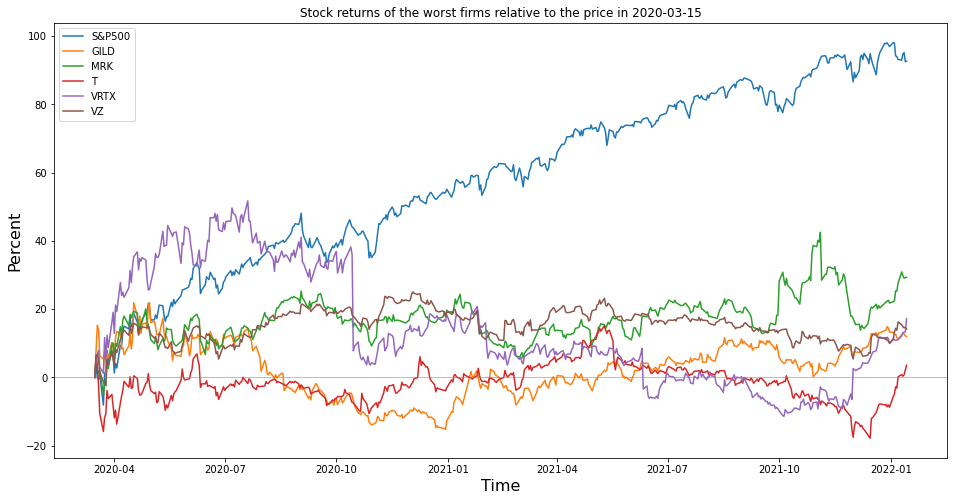

In [157]:
df = df.rename(columns={'ES=F': 'S&P500'})
plt.figure(figsize=(16,8))
for col in df.columns:
    df["p_" + col] = (df[col] / df[col].iat[0] - 1) * 100
    plt.plot(df["p_" + col], label="p_" + col)

plt.legend(df.columns)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Percent', fontsize=16)
plt.title("Stock returns of the worst firms relative to the price in {}".format(start_date))
plt.axhline(y = 0, color = 'gray', linewidth=0.5)
plt.show()